# Analysis HDB Resale Price vs Venues Data in Singapore
### Applied Data Science Capstone by Sazili Muhammad

## Table of contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)
* [7. References](#references)

## 1. Introduction <a name="introduction"></a>

#### 1.1 Background

Majority of Singapore population are living in the public housing, in which the developments are publicly governed and developed by the state **Housing and Development Board (HDB)** under a 99-year lease. These flats are located in housing estates, which are self-contained satellite towns with well-maintained schools, supermarkets, malls, community hospitals, clinics, hawker centres (food court) and sports and recreational facilities. Every housing estate includes **MRT stations** and bus stops that link residents to other parts of the city-state.

As compared to most parts of the world, public housing in Singapore is not ostracised by a wide majority of the population and its government, and acts as a necessary and vital measure to provide immaculate and safe housing surrounded by public amenities at affordable prices, especially during its rapid development and industrialisation in the early years of independence. It is also meant to foster social cohesion between social classes and races of Singapore, and prevent neglected areas or districts and ethnic enclaves from developing. As such, **it is considered a unique part of Singaporean culture and identity**, being commonly associated with the country.

There are a large variety of flat types and layouts which cater to various housing budgets. HDB flats were built in mind to primarily provide affordable housing for **Singaporeans/Permanent Residents** and their purchase can be financially aided by the **Central Provident Fund (CPF)** in addition to various grants. Due to changing demands, HDB introduced the Design, Build and Sell Scheme to produce up-market public housing developments.

New public housing flats are strictly only eligible for purchase towards Singaporean citizens. The housing schemes and grants available to finance the purchase of a flat are also only extended to households owned by Singaporeans, while Permanent Residents do not get any housing grants or subsidies from the Singaporean government and could only purchase **resale flats from the secondary market at a market price**. Such policies have helped **Singapore reach a home-ownership rate of 91%, one of the highest in the world**. In 2008, Singapore was lauded by the United Nations Habitat's State of the World's Cities report as the only slum-free city in the world. [\[1\]](#references)

#### 1.2 Problem

HDB flats surrounded by various amenities such as hawker centers, coffee shop, school, carpark, community centers, shopping center/malls, playground, sport center. Those amenities impact to housing resale price fluctuation and hence resale prices among towns in Singapore are not balanced. Some town are highly popular and more matured, makes increasing of resale price faster than other town. 

This situation makes house buyer has difficulties and limitation to purchase flats as they need. The challenges also facing to business owner to invest which location has more profitable and more promising. For government and regulation makers will have difficulties to make fair decision to build facilities in certain location.

#### 1.3 Purpose

This project will try to analyze the housing resale price vs various amenities (venues) in different angle. This project will give better insight to house buyer, business owner, or government/regulator to have better decision to invest and improve in various location across the island.

## 2. Data aquisition and data cleaning <a name="data"></a>

#### 2.1 Data Sources

The dataset for this project are captured from: 
1. Data.gov.sg [\[2\]](#references). This is Singapore government body which release data for public purpose. 
2. Google Maps to capture latitude and longitude.

#### 2.2 Data cleaning and data selection

Originally this data is very detail which comprises resale price from all towns in Singapore from Jan-2017 until Oct-2020 which has in detail block number, flat type, and flat floor. Since this project is not purpose into detail flat address but instead only interested on towns. So that, I clean up and summarize the dataset into average of housing resale price across all Singapore towns for year 2020 (since Jan-Oct). 

Note that, all the prices is in Singapore dollars (SGD).

The total Singapore towns are 26 towns, as follows:

In [1]:
# Import python libraries
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

# initialize list of lists 
data_ori = [
['ANG MO KIO', 400148.74],
['BEDOK', 405873.45],
['BISHAN', 627302.21],
['BUKIT BATOK', 397548.97],
['BUKIT MERAH', 562416.43],
['BUKIT PANJANG', 432441.11],
['BUKIT TIMAH', 696836.38],
['CENTRAL AREA', 585125.84],
['CHOA CHU KANG', 404028.3],
['CLEMENTI', 493022.24],
['GEYLANG', 429776.44],
['HOUGANG', 449869.59],
['JURONG EAST', 407133.8],
['JURONG WEST', 407372.67],
['KALLANG/WHAMPOA', 475455.08],
['MARINE PARADE', 480472.48],
['PASIR RIS', 499348.52],
['PUNGGOL', 462420.83],
['QUEENSTOWN', 584474.49],
['SEMBAWANG', 392777.98],
['SENGKANG', 450835.38],
['SERANGOON', 487274.65],
['TAMPINES', 478879.13],
['TOA PAYOH', 442313.77],
['WOODLANDS', 392932.61],
['YISHUN', 379274.21]
] 

# Create the pandas DataFrame 
data_ori = pd.DataFrame(data_ori, columns = ['Town','Resale Price']) 

data_ori

,Town,Resale Price
0,ANG MO KIO,400148.74
1,BEDOK,405873.45
2,BISHAN,627302.21
3,BUKIT BATOK,397548.97
4,BUKIT MERAH,562416.43
5,BUKIT PANJANG,432441.11
6,BUKIT TIMAH,696836.38
7,CENTRAL AREA,585125.84
8,CHOA CHU KANG,404028.30
9,CLEMENTI,493022.24


In order to use Foursquare to find venues data, I capture latitude and longitude for each Singapore town from Google Maps, as shown below:

In [2]:
data_latlng = [
['ANG MO KIO', 1.3691, 103.8454],
['BEDOK', 1.3236, 103.9273],
['BISHAN', 1.3526, 103.8352],
['BUKIT BATOK', 1.359, 103.7637],
['BUKIT MERAH', 1.2819, 103.8239],
['BUKIT PANJANG', 1.3774, 103.7719],
['BUKIT TIMAH', 1.3294, 103.8021],
['CENTRAL AREA', 1.2789, 103.8536],
['CHOA CHU KANG', 1.384, 103.747],
['CLEMENTI', 1.3162, 103.7649],
['GEYLANG', 1.3201, 103.8918],
['HOUGANG', 1.3612, 103.8863],
['JURONG EAST', 1.3329, 103.7436],
['JURONG WEST', 1.3404, 103.709],
['KALLANG/WHAMPOA', 1.3245, 103.8572],
['MARINE PARADE', 1.302, 103.8971],
['PASIR RIS', 1.3721, 103.9474],
['PUNGGOL', 1.3984, 103.9072],
['QUEENSTOWN', 1.2942, 103.7861],
['SEMBAWANG', 1.4491, 103.8185],
['SENGKANG', 1.3868, 103.8914],
['SERANGOON', 1.3554, 103.8679],
['TAMPINES', 1.3496, 103.9568],
['TOA PAYOH', 1.3343, 103.8563],
['WOODLANDS', 1.4382, 103.789],
['YISHUN', 1.4304, 103.8354]
] 

# Create the pandas DataFrame 
data_latlng = pd.DataFrame(data_latlng, columns = ['Town','Latitude','Longitude']) 

data_latlng

,Town,Latitude,Longitude
0,ANG MO KIO,1.3691,103.8454
1,BEDOK,1.3236,103.9273
2,BISHAN,1.3526,103.8352
3,BUKIT BATOK,1.3590,103.7637
4,BUKIT MERAH,1.2819,103.8239
5,BUKIT PANJANG,1.3774,103.7719
6,BUKIT TIMAH,1.3294,103.8021
7,CENTRAL AREA,1.2789,103.8536
8,CHOA CHU KANG,1.3840,103.7470
9,CLEMENTI,1.3162,103.7649


Combine original data from Data.gov.sg and Google maps (latitude/longitude), hence getting final dataset as follows:

In [3]:
data = pd.merge(left=data_ori, right=data_latlng, left_on='Town', right_on='Town').sort_values(by=['Resale Price'], inplace=False, ascending=False)
data.reset_index(drop=True, inplace=True)

data.shape
data

,Town,Resale Price,Latitude,Longitude
0,BUKIT TIMAH,696836.38,1.3294,103.8021
1,BISHAN,627302.21,1.3526,103.8352
2,CENTRAL AREA,585125.84,1.2789,103.8536
3,QUEENSTOWN,584474.49,1.2942,103.7861
4,BUKIT MERAH,562416.43,1.2819,103.8239
5,PASIR RIS,499348.52,1.3721,103.9474
6,CLEMENTI,493022.24,1.3162,103.7649
7,SERANGOON,487274.65,1.3554,103.8679
8,MARINE PARADE,480472.48,1.3020,103.8971
9,TAMPINES,478879.13,1.3496,103.9568


Hence, I will use this dataset above for further analysis for this project

## 3. Methodology <a name="methodology"></a>

The methodology in this project, I am using clustering approach based on the most common venues in various towns in Singapore. The venues data is getting from Foursquare website.

First, I will Singapore town data including the latitude and longitude.

Then, I will get venues data from Foursquare for each town within 1 km and limit to 1000 venues. This data collection based on the latitude and longitude from each town.

I create bar chart to show total venues for each town and bar chart to show housing resale price for each town, side-by-side, to visualize the correlation between total venues effected the housing resale price.

Another analysis, I am using clustering which finding the best cluster number using Elbow Method to find optimal k.

This k-cluster will be used to defined clustering for all towns and visualize in map.

The detail analysis will show as below.


## 4. Analysis <a name="analysis"></a>

In section Data, I grabbed the Singapore town data including latitude and longitude.

Now, I will visualize all the Singapore town in the map as per starting analysis.

In [5]:
!pip install geopy
from geopy.geocoders import Nominatim

#### First, I will get the latitude and longitude for Singapore, as follows:

In [6]:
address = 'Singapore'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [8]:
!pip install folium
import folium # map rendering library

     |████████████████████████████████| 93 kB 3.0 MB/s  eta 0:00:01


In [9]:
# create map of Manhattan using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(data['Latitude'], data['Longitude'], data['Town']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

The venues data collection from Foursquare is processed using this steps below. For each town will search venues in radius 1km which limited maximum up to 1000 venues.

In [10]:
CLIENT_ID = 'BS5Z2N114TFDNGVZDOIFF00OYVFVYJDQUDOKLLFKREXKLZGL' # your Foursquare ID
CLIENT_SECRET = 'QBZLHPCOHS5E3D25SNXGD1HZ11EPQ4EJ5WQ3MUBCITAN5ISH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BS5Z2N114TFDNGVZDOIFF00OYVFVYJDQUDOKLLFKREXKLZGL
CLIENT_SECRET:QBZLHPCOHS5E3D25SNXGD1HZ11EPQ4EJ5WQ3MUBCITAN5ISH


In [11]:
# type your answer here
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius in meters

import requests # library to handle requests

def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Below is the result of venues data for each town.

In [12]:
sg_venues = getNearbyVenues(names=data['Town'],
                            latitudes=data['Latitude'],
                            longitudes=data['Longitude'],
                            radius=radius
                                  )

sg_venues

,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BUKIT TIMAH,1.3294,103.8021,Peperoni Pizzeria,1.331104,103.807267,Pizza Place
1,BUKIT TIMAH,1.3294,103.8021,La Braceria Pizza & Grill,1.331761,103.807206,Italian Restaurant
2,BUKIT TIMAH,1.3294,103.8021,73@Hillcrest,1.331471,103.807556,Bistro
3,BUKIT TIMAH,1.3294,103.8021,Plank Sourdough Pizza By Baker & Cook,1.323890,103.796797,Pizza Place
4,BUKIT TIMAH,1.3294,103.8021,Lana Cake Shop,1.331789,103.806326,Bakery
...,...,...,...,...,...,...,...
1824,YISHUN,1.4304,103.8354,Warong Penyet Super,1.431995,103.827984,Asian Restaurant
1825,YISHUN,1.4304,103.8354,Chuan Kee Boneless Braised Duck,1.431506,103.828173,Chinese Restaurant
1826,YISHUN,1.4304,103.8354,Sincere Medical & Dental Clinic,1.437493,103.837571,Pharmacy
1827,YISHUN,1.4304,103.8354,Basketball Court @ Blk 761,1.423553,103.831767,Basketball Court


### 1. Correlation between HDB Resale Price vs Total Venues

The first analysis is to visualize the correlation beetween HDB Resale Price vs Total Venues.

From the collected venues data, then I will summarize the total venues for each town, as describe in following steps:

In [13]:
sg_venues_tot = sg_venues.groupby('Town').count().sort_values(by=['Venue'], inplace=False, ascending=False)
sg_venues_tot.reset_index(drop=False, inplace=True)

sg_venues_tot = sg_venues_tot.join(data.set_index('Town'), on='Town')

#sg_venues
sg_venues_tot

,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Resale Price,Latitude,Longitude
0,CENTRAL AREA,100,100,100,100,100,100,585125.84,1.2789,103.8536
1,MARINE PARADE,100,100,100,100,100,100,480472.48,1.3020,103.8971
2,GEYLANG,100,100,100,100,100,100,429776.44,1.3201,103.8918
3,BEDOK,99,99,99,99,99,99,405873.45,1.3236,103.9273
4,ANG MO KIO,93,93,93,93,93,93,400148.74,1.3691,103.8454
5,JURONG EAST,92,92,92,92,92,92,407133.80,1.3329,103.7436
6,YISHUN,92,92,92,92,92,92,379274.21,1.4304,103.8354
7,BUKIT MERAH,92,92,92,92,92,92,562416.43,1.2819,103.8239
8,CLEMENTI,90,90,90,90,90,90,493022.24,1.3162,103.7649
9,KALLANG/WHAMPOA,84,84,84,84,84,84,475455.08,1.3245,103.8572


From the data above, I created bar chart for total venues and bar chart for housing resale price for each town.

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('ggplot')

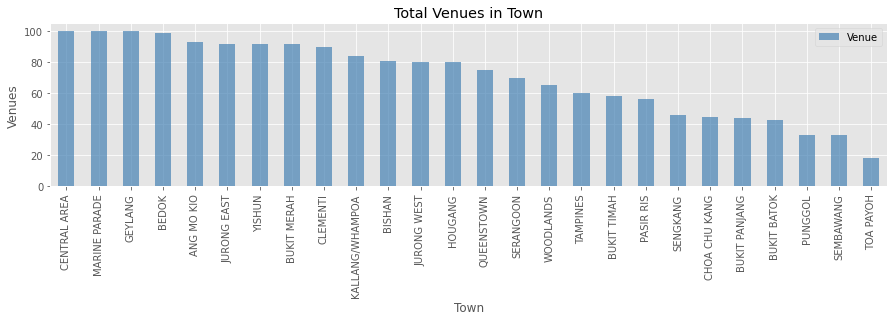

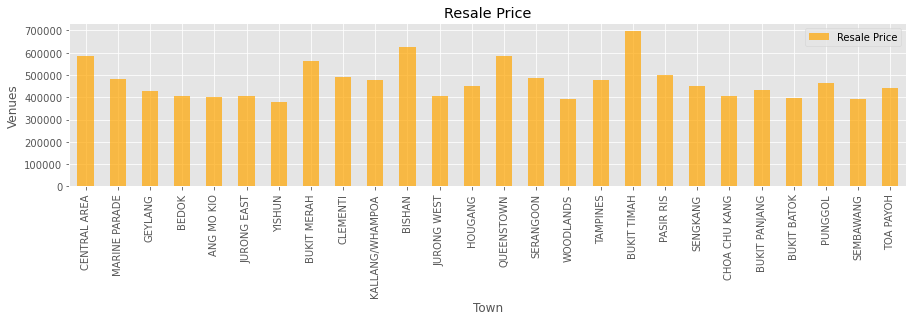

In [15]:
sg_venues_bar = sg_venues_tot.set_index("Town",drop=False,inplace=False)

ax = sg_venues_bar[['Town','Venue']].plot(
    kind='bar', title ="Total Venues in Town",
    figsize=(15,3),
    alpha=0.7,
    legend=True, 
    fontsize=10, 
    color=['steelblue']
)
ax.set_xlabel("Town",fontsize=12)
ax.set_ylabel("Venues",fontsize=12)
#plt.xticks(sg_venues_tot, sg_venues_tot['Town'], rotation='vertical')
plt.show()

ax = sg_venues_bar[['Town','Resale Price']].plot(
    kind='bar', title ="Resale Price",
    figsize=(15,3),
    alpha=0.7,
    legend=True, 
    fontsize=10, 
    color=['orange']
)
ax.set_xlabel("Town",fontsize=12)
ax.set_ylabel("Venues",fontsize=12)
#plt.xticks(sg_venues_tot, sg_venues_tot['Town'], rotation='vertical')
plt.show()

Hence from the bar chart above, it is shown that housing resale price is not depend on the total venues.

### 2. Finding optimal k and clustering approach

In order to find the optimal k, the best method is using Elbow Method.

This process is described as below steps.

In [16]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Town'] = sg_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_grouped = sg_onehot.groupby('Town').mean().reset_index()
sg_grouped

,Town,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ANG MO KIO,0.00000,0.000000,0.00000,0.00,0.000000,0.021505,0.000000,0.00,0.010753,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.010753,0.00000
1,BEDOK,0.00000,0.010101,0.00000,0.00,0.000000,0.030303,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.010101,0.00000
2,BISHAN,0.00000,0.000000,0.00000,0.00,0.000000,0.012346,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
3,BUKIT BATOK,0.00000,0.023256,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.023256,...,0.000000,0.023256,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
4,BUKIT MERAH,0.00000,0.000000,0.00000,0.00,0.000000,0.032609,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.01087,0.000000,0.00,0.000000,0.000000,0.000000,0.01087
5,BUKIT PANJANG,0.00000,0.022727,0.00000,0.00,0.000000,0.045455,0.000000,0.00,0.022727,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
6,BUKIT TIMAH,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.034483,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.017241,0.017241,0.000000,0.00000
7,CENTRAL AREA,0.00000,0.000000,0.00000,0.02,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.04,0.020000,0.000000,0.000000,0.01000
8,CHOA CHU KANG,0.00000,0.000000,0.00000,0.00,0.000000,0.022222,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
9,CLEMENTI,0.00000,0.000000,0.00000,0.00,0.011111,0.044444,0.000000,0.00,0.011111,...,0.011111,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [18]:
cat_features = ['Town', 'Venue Category']
cont_features = ['Resale Price']

sg_cluster = sg_venues.join(data.set_index('Town'), on='Town')

sg_cluster[cont_features].describe()

for col in cat_features:
    dummies = pd.get_dummies(sg_cluster[col], prefix=col)
    sg_cluster = pd.concat([sg_cluster, dummies], axis=1)
    sg_cluster.drop(col, axis=1, inplace=True)
  
sg_cluster.drop('Venue', axis=1, inplace=True)

sg_cluster

,Town Latitude,Town Longitude,Venue Latitude,Venue Longitude,Resale Price,Latitude,Longitude,Town_ANG MO KIO,Town_BEDOK,Town_BISHAN,...,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Vineyard,Venue Category_Water Park,Venue Category_Waterfront,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Wings Joint,Venue Category_Yoga Studio
0,1.3294,103.8021,1.331104,103.807267,696836.38,1.3294,103.8021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.3294,103.8021,1.331761,103.807206,696836.38,1.3294,103.8021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.3294,103.8021,1.331471,103.807556,696836.38,1.3294,103.8021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.3294,103.8021,1.323890,103.796797,696836.38,1.3294,103.8021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.3294,103.8021,1.331789,103.806326,696836.38,1.3294,103.8021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1.4304,103.8354,1.431995,103.827984,379274.21,1.4304,103.8354,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1825,1.4304,103.8354,1.431506,103.828173,379274.21,1.4304,103.8354,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1826,1.4304,103.8354,1.437493,103.837571,379274.21,1.4304,103.8354,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1827,1.4304,103.8354,1.423553,103.831767,379274.21,1.4304,103.8354,0,0,0,...,0,0,0,0,0,0,0,0,0,0


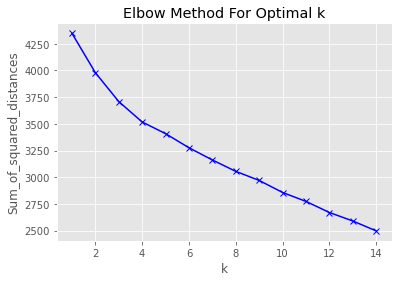

In [19]:
mms = MinMaxScaler()
mms.fit(sg_cluster)
data_transformed = mms.transform(sg_cluster)

#data_transformed

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Even though elbow method is not so obviously see the elbow in the graph, but I can estimate **the best k cluster is 3.**

Now, I will generate clustering based on the k cluster above.

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Town'] = sg_grouped['Town']

for ind in np.arange(sg_grouped.shape[0]):
    town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

town_venues_sorted.head()

sg_grouped_clustering = sg_grouped.drop('Town', 1)
sg_grouped_clustering

,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,...,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0.00000,0.000000,0.00000,0.00,0.000000,0.021505,0.000000,0.00,0.010753,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.010753,0.00000
1,0.00000,0.010101,0.00000,0.00,0.000000,0.030303,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.010101,0.00000
2,0.00000,0.000000,0.00000,0.00,0.000000,0.012346,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
3,0.00000,0.023256,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.023256,0.000000,...,0.000000,0.023256,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
4,0.00000,0.000000,0.00000,0.00,0.000000,0.032609,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.01087,0.000000,0.00,0.000000,0.000000,0.000000,0.01087
5,0.00000,0.022727,0.00000,0.00,0.000000,0.045455,0.000000,0.00,0.022727,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
6,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.034483,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.017241,0.017241,0.000000,0.00000
7,0.00000,0.000000,0.00000,0.02,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.04,0.020000,0.000000,0.000000,0.01000
8,0.00000,0.000000,0.00000,0.00,0.000000,0.022222,0.000000,0.00,0.000000,0.022222,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000
9,0.00000,0.000000,0.00000,0.00,0.011111,0.044444,0.000000,0.00,0.011111,0.000000,...,0.011111,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000


In [25]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters based on Elbow Method
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15] 

# add clustering labels
town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
town_venues_sorted

,Cluster Labels,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,2,ANG MO KIO,Chinese Restaurant,Food Court,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Dessert Shop,Supermarket,Vegetarian / Vegan Restaurant,Noodle House,Bar,Bus Station,Seafood Restaurant,Sandwich Place,Gym / Fitness Center,Bubble Tea Shop
1,1,BEDOK,Food Court,Chinese Restaurant,Coffee Shop,Noodle House,Supermarket,Café,Fast Food Restaurant,Asian Restaurant,Bakery,Japanese Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Indian Restaurant,Shopping Mall,Pizza Place
2,0,BISHAN,Chinese Restaurant,Café,Thai Restaurant,Bakery,Coffee Shop,Indian Restaurant,Ice Cream Shop,Spa,Trail,Food Court,Vegetarian / Vegan Restaurant,Sushi Restaurant,Bus Stop,Pub,Dessert Shop
3,1,BUKIT BATOK,Italian Restaurant,Café,Historic Site,Shopping Mall,Bus Station,Chinese Restaurant,Coffee Shop,Supermarket,Indian Restaurant,Video Store,Gym Pool,Metro Station,Bus Line,Ice Cream Shop,Bus Stop
4,0,BUKIT MERAH,Chinese Restaurant,Food Court,Coffee Shop,Noodle House,Café,Hainan Restaurant,Asian Restaurant,Fast Food Restaurant,Bakery,Pool,Bookstore,Supermarket,Sushi Restaurant,Karaoke Bar,Japanese Restaurant
5,2,BUKIT PANJANG,Fast Food Restaurant,Coffee Shop,Food Court,Park,Supermarket,Sushi Restaurant,Asian Restaurant,Noodle House,Restaurant,Miscellaneous Shop,Bookstore,Pharmacy,Sandwich Place,Bike Trail,Market
6,1,BUKIT TIMAH,Bakery,Italian Restaurant,Pizza Place,Café,Hotel,Indian Restaurant,Japanese Restaurant,Gym,Food Court,Park,Seafood Restaurant,Building,Coffee Shop,BBQ Joint,Playground
7,1,CENTRAL AREA,Hotel,Café,Japanese Restaurant,Gym / Fitness Center,Waterfront,Coffee Shop,Cocktail Bar,Restaurant,Italian Restaurant,Hotel Bar,Gym,Harbor / Marina,Korean Restaurant,Dumpling Restaurant,Mexican Restaurant
8,2,CHOA CHU KANG,Fast Food Restaurant,Coffee Shop,Food Court,Café,Bookstore,Bus Station,Supermarket,Italian Restaurant,Stadium,Bubble Tea Shop,Smoke Shop,Skate Park,Miscellaneous Shop,Food & Drink Shop,Sandwich Place
9,1,CLEMENTI,Food Court,Chinese Restaurant,Coffee Shop,Indian Restaurant,Bakery,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Café,Grocery Store,Gym,Supermarket,Dim Sum Restaurant,Fried Chicken Joint,Chinese Breakfast Place


In [27]:
sg_merged = data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each town
sg_merged = sg_merged.join(town_venues_sorted.set_index('Town'), on='Town', how='left', lsuffix='', rsuffix='_right')

sg_merged = sg_merged.join(sg_venues_tot.set_index('Town'), on='Town', how='left', lsuffix='', rsuffix='_right')

#sg_venues_tot

#sg_merged.head() # check the last columns!

sg_merged['Cluster Labels'] = sg_merged['Cluster Labels'].fillna(0).astype('int')
sg_merged = sg_merged.sort_values(by=['Cluster Labels'], inplace=False, ascending=True)
sg_merged.reset_index(drop=True, inplace=True)
sg_merged

,Town,Resale Price,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,15th Most Common Venue,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Resale Price_right,Latitude_right,Longitude_right
0,BISHAN,627302.21,1.3526,103.8352,0,Chinese Restaurant,Café,Thai Restaurant,Bakery,Coffee Shop,...,Dessert Shop,81,81,81,81,81,81,627302.21,1.3526,103.8352
1,BUKIT MERAH,562416.43,1.2819,103.8239,0,Chinese Restaurant,Food Court,Coffee Shop,Noodle House,Café,...,Japanese Restaurant,92,92,92,92,92,92,562416.43,1.2819,103.8239
2,TOA PAYOH,442313.77,1.3343,103.8563,0,Chinese Restaurant,Coffee Shop,Pool,Trail,Snack Place,...,Filipino Restaurant,18,18,18,18,18,18,442313.77,1.3343,103.8563
3,HOUGANG,449869.59,1.3612,103.8863,0,Chinese Restaurant,Bus Station,Coffee Shop,Noodle House,Food Court,...,Building,80,80,80,80,80,80,449869.59,1.3612,103.8863
4,KALLANG/WHAMPOA,475455.08,1.3245,103.8572,0,Chinese Restaurant,Noodle House,Asian Restaurant,Food Court,Dessert Shop,...,Hostel,84,84,84,84,84,84,475455.08,1.3245,103.8572
5,BUKIT TIMAH,696836.38,1.3294,103.8021,1,Bakery,Italian Restaurant,Pizza Place,Café,Hotel,...,Playground,58,58,58,58,58,58,696836.38,1.3294,103.8021
6,GEYLANG,429776.44,1.3201,103.8918,1,Food Court,Chinese Restaurant,Asian Restaurant,Noodle House,Fast Food Restaurant,...,Coffee Shop,100,100,100,100,100,100,429776.44,1.3201,103.8918
7,BEDOK,405873.45,1.3236,103.9273,1,Food Court,Chinese Restaurant,Coffee Shop,Noodle House,Supermarket,...,Pizza Place,99,99,99,99,99,99,405873.45,1.3236,103.9273
8,JURONG WEST,407372.67,1.3404,103.7090,1,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Food Court,...,Sandwich Place,80,80,80,80,80,80,407372.67,1.3404,103.7090
9,BUKIT BATOK,397548.97,1.3590,103.7637,1,Italian Restaurant,Café,Historic Site,Shopping Mall,Bus Station,...,Bus Stop,43,43,43,43,43,43,397548.97,1.3590,103.7637


Based on the data above, it is enough data to visualize the clustering in the map, as follows:

In [28]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
colors_array = ['blue','red','green']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, town, cluster, price, venues in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Town'], sg_merged['Cluster Labels'], sg_merged['Resale Price'], sg_merged['Venue']):
    label = folium.Popup(
        'Town: ' + str(town) + '<br>' +
        'Resale Price: ' + str(price) + '<br>' +
        'Total Venues: ' + str(venues) + '<br>' +
        'Cluster: ' + str(cluster), 
        parse_html=False, max_width=200)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally in the map, it is shown 3 cluster for all town in Singapore based on venues data from Foursquare.

## 5. Results and Discussion <a name="results"></a>

In the section Analysis shows that there are 3 towns has the highest amount of venues, they are CENTRAL AREA, MARINE PARADE, and GEYLANG. This is no doubt because those 3 towns are considered matured town, which means these towns has been developed earlier than other towns.

In the bar chart, we can see that all towns has uniformity in venues which mostly are food and restaurant. The amount of venues for each town has small gap between other town. There are no town that has very high venues compare with others. This means every town in Singapore is equally developed.

In the bar chart of housing resale price shows that the price does not depend on the total venues.

Based on Elbow Method which described in Analysis section, I can find the optimal k-cluster = 3.

The home buyer or business owner can focus on Cluster 2 which has lower housing price and has fewer variety of venues. The home buyer has more opportunities to buy their dream house. The business owner can invest other business sector which has lower competitor.

## 6. Conclusion <a name="conclusion"></a>

Based on analyst and result which the data given from Singapore HDB Resale Price and Foursquare data, I can conclude these following:
1. There is no proof that the amount of venue in certain location effected the housing resale price in Singapore
2. Housing resale price in Singapore basically depend upon the amenities, maturity of the town, and location near city area, while Foursquare doesn't have enough data to support those criterias.
3. Home buyer can target the house in Cluster 2 which is lower house price.
4. Business owner can invest other business sector in Cluster 2 which those towns has lower competitor compared with other towns.

## 7. References <a name="references"></a>

* [\[1\] Public Housing in Singapore](https://en.wikipedia.org/wiki/Public_housing_in_Singapore)
* [\[2\] Resale Flat Prices](https://data.gov.sg/dataset/resale-flat-prices)